# Verifying generalizability


In [1]:
%cd /home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1

/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1


In [2]:
from src.util import read_results, train_test_validate_split, eval_result, eval_sota_models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%load_ext autoreload
%autoreload 2

In [3]:
result_df = read_results()
_, _, validate = train_test_validate_split(read_results())

train set:
	Records: 210953
	Positive (speedup > 1 with factorizing)/Negative: 39406/171547 = 0.23 s
	Dataset types: ['synthetic' 'hamlet']
\Compute Units: ['CPU 32c' '1080' 'CPU 16c' 'CPU 08c' 'v100' '2080' 'a40' 'p100']
test set:
	Records: 90409
	Positive (speedup > 1 with factorizing)/Negative: 17014/73395 = 0.23 s
	Dataset types: ['synthetic' 'hamlet']
\Compute Units: ['2080' '1080' 'CPU 16c' 'a40' 'v100' 'CPU 08c' 'CPU 32c' 'p100']
validate set:
	Records: 11187
	Positive (speedup > 1 with factorizing)/Negative: 1123/10064 = 0.11 s
	Dataset types: ['synthetic' 'hamlet' 'tpc_ai']
\Compute Units: ['p100' 'CPU 32c' 'CPU 16c' 'CPU 08c' '2080' '1080' 'v100' 'a40']


In [4]:

results = {}

file_to_name = {
    "STAT1_label.csv": "STAT.1",
    "STAT5_label.csv": "STAT.5",
    "XGB3_label.csv": "XGB.3",
    "XGB5_label.csv": "XGB.5",
    
}
for eval_type in ["new hardware", "new datasets", "full"]:
    val_df = result_df.loc[validate.index]
    if eval_type == "full":
        loc = val_df.index
    elif eval_type == "new hardware":
        loc = val_df[val_df.compute_unit == 'p100'].index
    else:
        loc = val_df[val_df.dataset_type != 'synthetic'].index
    y_true = validate.label.loc[loc]
    full_dataset = validate.loc[loc]
    
    results.update({(name, eval_type): val for (name, val) in eval_sota_models(full_dataset, y_true, full_dataset).items()})
    
    for f in glob.glob("evaluation/predictions/*_label.csv"):
        df = pd.read_csv(f, index_col= 0)
        assert len(validate.index) == len(set(validate.index).intersection(df.index))
        print([col for col in df.columns if 'y_pred' in col])
        y_pred = df[[col for col in df.columns if 'y_pred' in col][0]]
        name = file_to_name[f.split('/')[-1]]
        results[(name, eval_type)] = eval_result(y_true, y_pred.loc[loc], target_col='label', full_dataset=full_dataset)[0]
results.keys()

2024-03-25 14:55:07.333 | INFO     | src.util:eval_model:472 - Model <class 'src.estimators.MorpheusFI'>, MorpheusFI
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S',
       'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'spa

['stat_y_pred']
['xgb_y_pred_time_saved']
['xgb_y_pred_speedup']
['stat_y_pred']
['stat_y_pred']


2024-03-25 14:55:07.785 | INFO     | src.util:eval_model:472 - Model <class 'src.estimators.MorpheusFI'>, MorpheusFI
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S',
       'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'spa

['xgb_y_pred_time_saved']
['xgb_y_pred_speedup']
['stat_y_pred']


2024-03-25 14:55:07.940 | INFO     | src.util:eval_model:475 - Score: 0.25663716814159293


['stat_y_pred']
['xgb_y_pred_time_saved']
['xgb_y_pred_speedup']
['stat_y_pred']


dict_keys([('MorpheusFI', 'new hardware'), ('Morpheus', 'new hardware'), ('Amalur', 'new hardware'), ('STAT.1', 'new hardware'), ('XGB.5', 'new hardware'), ('XGB.3', 'new hardware'), ('STAT.5', 'new hardware'), ('MorpheusFI', 'new datasets'), ('Morpheus', 'new datasets'), ('Amalur', 'new datasets'), ('STAT.1', 'new datasets'), ('XGB.5', 'new datasets'), ('XGB.3', 'new datasets'), ('STAT.5', 'new datasets'), ('MorpheusFI', 'full'), ('Morpheus', 'full'), ('Amalur', 'full'), ('STAT.1', 'full'), ('XGB.5', 'full'), ('XGB.3', 'full'), ('STAT.5', 'full')])

In [5]:
eval_results = pd.DataFrame(results).T
merged_results = (
    eval_results.reset_index(names=["model", "eval_type"])
    .merge(pd.json_normalize(eval_results.speedup), left_index=True, right_index=True)
    .drop(columns="speedup")
)
merged_results

,model,eval_type,accuracy,precision,recall,f1,y_true_mat_time,y_true_fact_time,y_true_best_time,y_true_time_saved,...,y_pred_mat_time,y_pred_fact_time,y_pred_best_time,y_pred_time_saved,y_pred_speedup_avg,y_pred_speedup_real,TP,FP,TN,FN
0,MorpheusFI,new hardware,0.058704,0.058776,0.979626,0.110898,1408.911454,472.685621,472.685621,936.225833,...,5201.873024,14099.029838,4282.279116,-8897.156814,0.530243,0.368953,"(577, 3.3198505631577966)","(9240, 0.3560437066846622)","(0, nan)","(12, 3.624838253778563)"
1,Morpheus,new hardware,0.267169,0.050435,0.629881,0.093392,1408.911454,472.685621,472.685621,936.225833,...,3302.083949,9981.705993,2884.934398,-6679.622045,0.451173,0.330814,"(371, 2.2116919019551227)","(6985, 0.3576650981051124)","(2255, 0.35102134789448713)","(218, 5.22254191909193)"
2,Amalur,new hardware,0.752671,0.043155,0.147708,0.066795,1408.911454,472.685621,472.685621,936.225833,...,1030.745609,1706.921812,893.265095,-676.176203,0.610594,0.603862,"(87, 2.584206354159701)","(1929, 0.5215815128061159)","(7311, 0.31236672296037205)","(502, 3.4546332294332616)"
3,STAT.1,new hardware,0.944552,0.744444,0.113752,0.197349,1408.911454,472.685621,472.685621,936.225833,...,321.373476,82.449225,77.139285,238.924251,3.176527,3.897835,"(67, 4.0064333910226155)","(23, 0.7589717356957807)","(9217, 0.3550382445313307)","(522, 3.23873715859938)"
4,XGB.5,new hardware,0.955235,0.585928,0.862479,0.697802,1408.911454,472.685621,472.685621,936.225833,...,1181.250378,463.421310,436.081688,717.829069,2.252792,2.548977,"(508, 3.4547783396491565)","(359, 0.5519304863674483)","(8881, 0.348125301785876)","(81, 2.5188202153780246)"
5,XGB.3,new hardware,0.984027,0.868601,0.864177,0.866383,1408.911454,472.685621,472.685621,936.225833,...,1326.535881,484.286164,455.328374,842.249717,3.121984,2.739157,"(509, 3.4713523349295525)","(77, 0.8125233096876318)","(9163, 0.35220774363421703)","(80, 2.4016686938531113)"
6,STAT.5,new hardware,0.940075,0.0,0.0,0.0,1408.911454,472.685621,472.685621,936.225833,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,"(0, nan)","(0, nan)","(9240, 0.3560437066846622)","(589, 3.326064234274009)"
7,MorpheusFI,new datasets,0.416503,0.419986,0.907855,0.574295,1895.431467,804.295675,804.295675,1091.135792,...,8615.560419,13233.603457,7565.970170,-4618.043037,2.589603,0.651037,"(601, 5.309016209463859)","(830, 0.6204859272719228)","(35, 0.4635063194603)","(61, 2.6003088841659823)"
8,Morpheus,new datasets,0.588736,0.559028,0.243202,0.338947,1895.431467,804.295675,804.295675,1091.135792,...,719.385092,626.455806,369.821568,92.929285,2.256180,1.148341,"(161, 3.5884141741026476)","(127, 0.5672856408388689)","(738, 0.6221961577645935)","(501, 5.532141520541672)"
9,Amalur,new datasets,0.652914,0.671875,0.389728,0.493308,1895.431467,804.295675,804.295675,1091.135792,...,764.917434,463.240961,332.248282,301.676473,2.721876,1.651230,"(258, 3.772472326329065)","(126, 0.5706541747294778)","(739, 0.6215475166453209)","(404, 5.881286444626252)"


## SOTA comparison

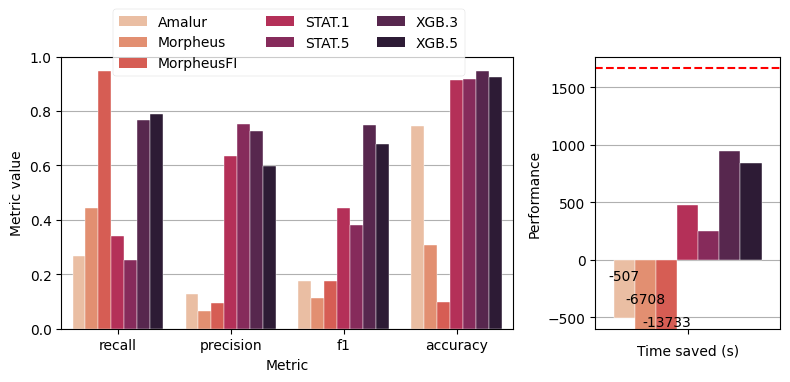

In [70]:
# colors = []
# for c in sns.color_palette("rocket_r", 6):
#     colors.extend([
#                    sns.set_hls_values(c, l=0.4),
#                    c])
# colors.pop(1)
colors = sns.color_palette("rocket_r", 7)

sns.set_context(rc = {'patch.linewidth': 0.3})
fig, axs = plt.subplot_mosaic("AAB", figsize=(8, 4))
melted_df = pd.melt(merged_results, id_vars=["model", "eval_type"], var_name="metric", value_name="metric_value").sort_values(by="model")
max_time_saved = merged_results.y_true_time_saved.max()
min_ylim = -600
def plot_metrics(ax, metrics: list, legend=True):
    ax.set_axisbelow(True)
    ax.grid(axis="y")
    ax = sns.barplot(
        data=melted_df[(melted_df.metric.apply(lambda x: x in metrics)) & (melted_df.eval_type=='full')],
        x="metric",
        y="metric_value",
        hue="model",
        palette=colors,
        ax=ax,
    )
    if not legend:
        ax.get_legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(0.1, 1.20), ncol=3)
    # Add metric values as text on top of every bar
    for i, p in enumerate(ax.patches):
        p.set_edgecolor("white")
        fmt = ".2f" if abs(p.get_height()) < 1 else ".0f"
        height = p.get_height()
        if height <( min_ylim+100):
            ax.annotate(
                format(p.get_height(),fmt),
                (p.get_x() + p.get_width() / 2.0, 100*(i+1)*-2),
                ha="center",
                va="center",
                xytext=(0, 5),
                textcoords="offset points",
            )

ax_left = axs["A"]
ax_right = axs["B"]
plot_metrics(ax_left, ["accuracy", "precision", "recall", "f1"])
plot_metrics(ax_right, ["y_pred_time_saved"], legend=False)

ax_left.set_xlabel("Metric")
ax_left.set_ylabel("Metric value" )
ax_left.set_ylim(0., 1.)

ax_right.axhline(max_time_saved, ls="--", color="red", label="Maximum achievable time saved")
ax_right.set_ylim(min_ylim, max_time_saved+100)
ax_right.set_xlabel("Time saved (s)")
ax_right.set_ylabel("Performance")
ax_right.set_xticklabels(labels=[None])

fig.tight_layout()
fig.savefig("/home/pepijn/Documents/uni/y5/thesis/writing/overleaf/chapters/06_evaluation/figures/eval_sota_results.pdf", bbox_inches="tight")